In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

Load and View Data

In [14]:
# df = pd.read_csv('./monitoring_data_logging.csv')
df = pd.read_csv('./NPIC_Pond_Data_for_AI.csv')
df.head()

,Temperature,pH,Turbidity,DissolvedOxygen
0,34.01,8.71,149.34,10.11
1,34.01,8.71,149.10,10.11
2,34.01,8.71,148.98,10.11
3,34.01,8.71,148.88,10.11
4,34.01,8.71,148.71,10.11


Split Train as Input (X) and Output (y)

In [15]:
X = df[['Temperature', 'pH', 'Turbidity']]
y = df['DissolvedOxygen']


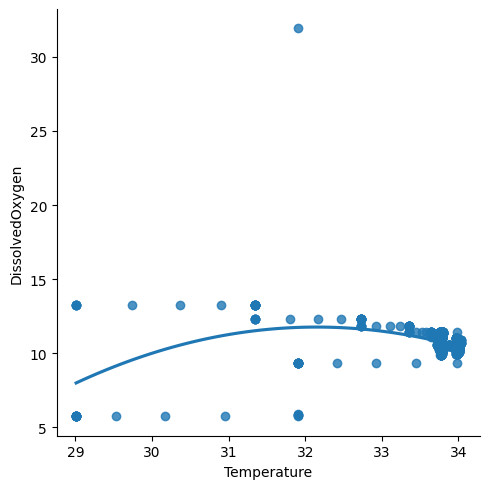

In [16]:
sns.lmplot(x='Temperature', y='DissolvedOxygen', data=df, order=2, ci=None)

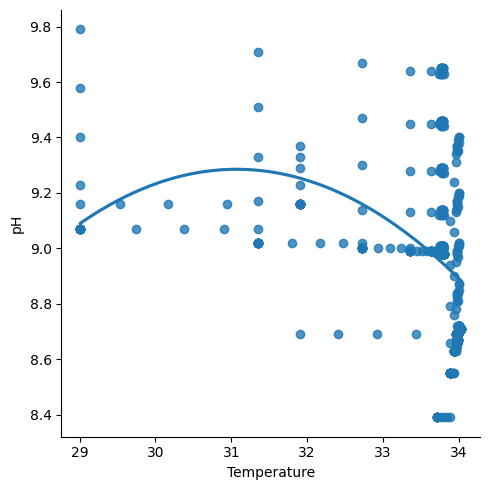

In [17]:
sns.lmplot(x='Temperature', y='pH', data=df, order=2, ci=None)

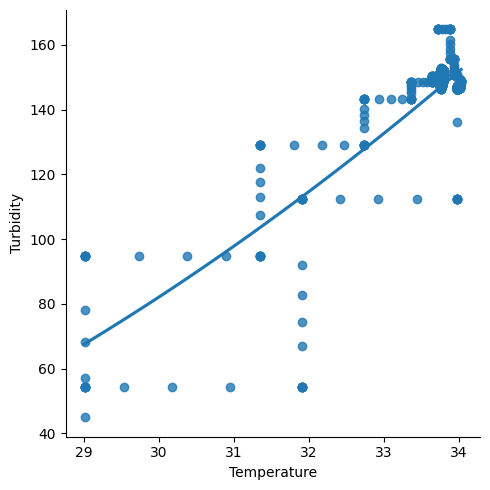

In [18]:
sns.lmplot(x='Temperature', y='Turbidity', data=df, order=2, ci=None)

In [5]:
X.head()

,Temperature,pH,Turbidity
0,34.01,8.71,149.34
1,34.01,8.71,149.10
2,34.01,8.71,148.98
3,34.01,8.71,148.88
4,34.01,8.71,148.71


In [6]:
y.head()

0    10.11
1    10.11
2    10.11
3    10.11
4    10.11
Name: DissolvedOxygen, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
linear_regression = LinearRegression()

Training

In [9]:
linear_regression.fit(X_train, y_train)

LinearRegression()

Save Trained Model to File

In [21]:
filename = 'water_quality_model.pkl'
pickle.dump(linear_regression, open(filename, 'wb'))

In [10]:
print(linear_regression.score(X_test, y_test))

0.32417495562680076


Make Predictions

In [11]:
y_predict = linear_regression.predict(X_test)

X_test


,Temperature,pH,Turbidity
86,33.99,9.19,146.77
292,31.91,9.16,54.32
329,31.35,9.02,129.16
421,33.78,8.98,150.69
494,33.77,8.99,152.25
...,...,...,...
735,33.76,9.64,147.02
674,33.76,9.01,147.41
339,32.73,9.14,129.16
155,33.88,8.55,155.52


In [12]:
y_predict.reshape(-1,1)

array([[10.65500871],
       [ 6.53566432],
       [11.8939188 ],
       [10.97055663],
       [11.0893867 ],
       [11.20445919],
       [10.53371094],
       [10.70379052],
       [10.94164985],
       [10.76182843],
       [10.70379052],
       [11.09341016],
       [10.15147106],
       [10.43908308],
       [11.10563727],
       [10.30487056],
       [11.07233206],
       [10.59097676],
       [10.9351163 ],
       [10.90218096],
       [10.818242  ],
       [10.50764455],
       [10.32781606],
       [ 8.19099249],
       [10.28052407],
       [10.59097676],
       [ 6.53566432],
       [10.43908308],
       [11.09612389],
       [11.20901922],
       [11.8939188 ],
       [10.76182843],
       [10.39584146],
       [11.00014054],
       [10.30421314],
       [11.07589037],
       [10.62930895],
       [10.79422695],
       [10.86608717],
       [10.78743713],
       [10.78688799],
       [10.98113572],
       [10.54868833],
       [10.59097676],
       [10.30487056],
       [11